In [56]:
import xgboost
import pyarrow
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [66]:
train_x = pd.read_parquet('./../cleandata/trainx.parquet')
train_y = pd.read_parquet('./../cleandata/trainy.parquet')
test_x = pd.read_parquet('./../cleandata/testx.parquet')
test_y = pd.read_parquet('./../cleandata/testy.parquet')
print(train_y)
print(train_x)
idx = np.random.permutation(train_x.index)
train_x.reindex(idx)
train_y.reindex(idx)

        Winner
96441      0.0
96443      0.0
96440      1.0
96445      1.0
96438      1.0
...        ...
173449     1.0
173481     0.0
173424     0.0
173450     0.0
173482     0.0

[74912 rows x 1 columns]
         surface   best_of  overdog_rank  overdog_hand  underdog_rank  \
96441   0.914817 -0.532022     -0.536817      0.381580      -0.365436   
96443   0.914817 -0.532022     -0.488723      0.381580      -0.222015   
96440   0.914817 -0.532022      0.316861     -2.535544       0.330424   
96445   0.914817 -0.532022     -0.007777      0.381580      -0.386684   
96438   0.914817 -0.532022      0.605429      0.381580      -0.121088   
...          ...       ...           ...           ...            ...   
173449  0.914817 -0.532022     -0.608959      0.381580      -0.615096   
173481  0.914817 -0.532022     -0.548841      0.381580      -0.583225   
173424  0.914817 -0.532022     -0.512770      0.381580      -0.657591   
173450  0.914817 -0.532022     -0.332415      0.381580      -0.3

,Winner
158759,1.0
162279,0.0
109311,1.0
165847,0.0
139427,1.0
...,...
99018,0.0
136973,0.0
147601,0.0
153789,0.0


In [61]:
cols = [
'surface',
'best_of',
'overdog_rank',
'overdog_hand',
'underdog_rank',
'underdog_hand',
'overdog_h2h_wins',
'underdog_h2h_wins',
'overdog_h2h_recent_wins',
'underdog_h2h_recent_wins',
'overdog_h2h_surface_wins',
'underdog_h2h_surface_wins',
'overdog_h2h_surface_recent_wins',
'underdog_h2h_surface_recent_wins',
'overdog_gotupset',
'overdog_notupset',
'overdog_recent_gotupset',
'overdog_recent_notupset',
'underdog_upset',
'underdog_notupset',
'underdog_recent_upset',
'underdog_recent_notupset',
'total_wins_overdog',
'total_losses_overdog',
'recent_wins_overdog',
'recent_losses_overdog',
'total_wins_surface_overdog',
'total_losses_surface_overdog',
'recent_wins_surface_overdog',
'recent_losses_surface_overdog',
'total_wins_underdog',
'total_losses_underdog',
'recent_wins_underdog',
'recent_losses_underdog',
'total_wins_surface_underdog',
'total_losses_surface_underdog',
'recent_wins_surface_underdog',
'recent_losses_surface_underdog',
'overdog_ace_MVA',
'overdog_df_MVA',
'overdog_svpt_MVA',
'overdog_1stIn_MVA',
'overdog_1stWon_MVA',
'overdog_2ndWon_MVA',
'overdog_SvGms_MVA',
'overdog_bpSaved_MVA',
'overdog_bpFaced_MVA',
'underdog_ace_MVA',
'underdog_df_MVA',
'underdog_svpt_MVA',
'underdog_1stIn_MVA',
'underdog_1stWon_MVA',
'underdog_2ndWon_MVA',
'underdog_SvGms_MVA',
'underdog_bpSaved_MVA',
'underdog_bpFaced_MVA']

train_x = train_x[cols]
test_x = test_x[cols]

xgb_params = {
    "eta": 0.01,
    "max_depth": 5,
    "gamma": 1,
    "min_child_weight": 1,
    "subsample": 0.5,
    "colsample_bytree": 0.8,
    "max_bin": 256,
    "objective": "binary:logistic",
    "tree_method": "hist",
    "silent": 1,
    'num_parallel_tree':3,
    'lambda': 1.1,
    'alpha':0.1,
    'gamma': 4
}

model = xgboost.XGBClassifier(**xgb_params)

kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, train_x, train_y, cv=kfold)
print(results)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


/home/peter/anaconda3/envs/default3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/peter/anaconda3/envs/default3/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/peter/anaconda3/envs/default3/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.66123865 0.65856914 0.65198238 0.66453077 0.66773461 0.68642371
 0.69576826 0.69470031 0.68802563 0.66172741]
Accuracy: 67.31% (1.55%)


0.650491217624293
0.7021972447671935


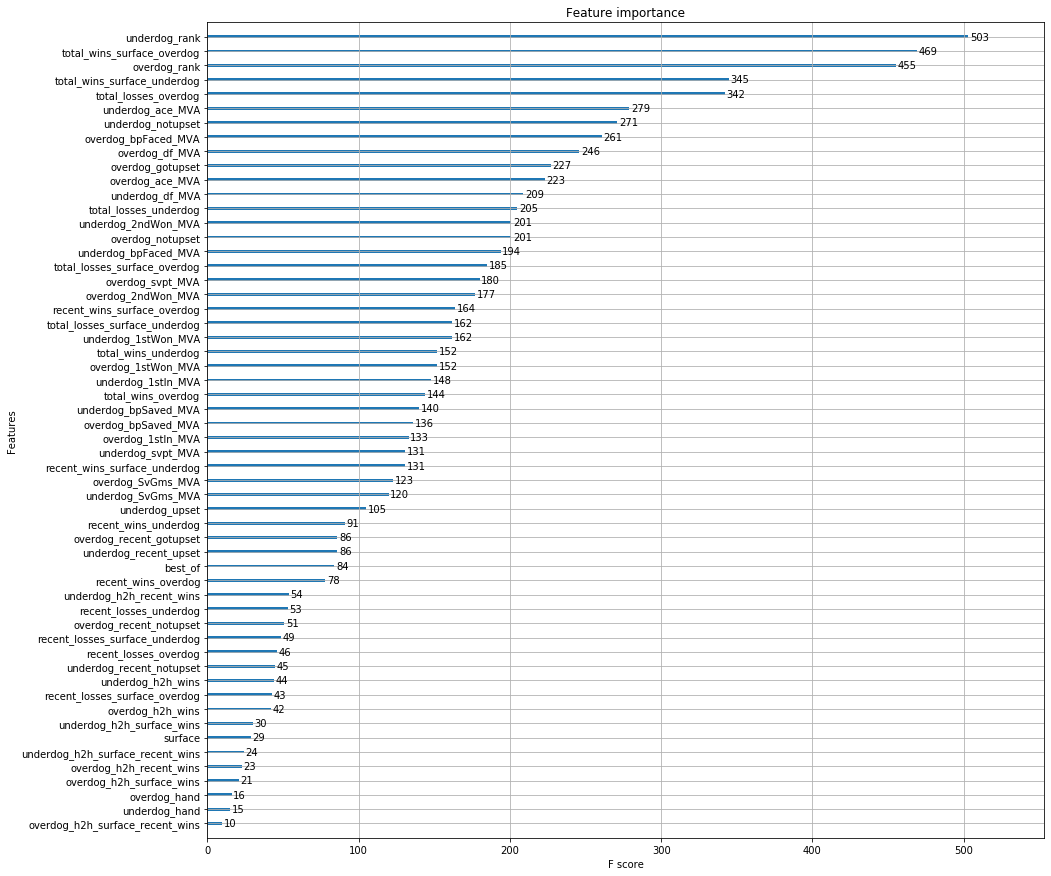

In [63]:
model.fit(train_x, train_y)

preds = model.predict(test_x)
print(accuracy_score(test_y,preds))

preds_train = model.predict(train_x)
print(accuracy_score(train_y, preds_train))

ax = xgboost.plot_importance(model)
fig = ax.figure
fig.set_size_inches(15, 15)

# Analysis

Nice to see that overdog_rank and underdog_rank are the most important features.
It is clear that overdog_hand and underdog_hand do not make much of a difference. Intuitively this makes sense.
All of the MVA stats seems to be quite important.
It is promising that the previous upset/not upset statistics seem to be pretty important. 
It is puzzling that the h2h features do not seem to be very important.
For feature reduction purposes it likely makes sense to remodel the features as difference between overdog and underdog, versus having one feature for each.

In [67]:
train_x = train_x['overdog_h2h_wins'] - train_x['underdog_h2h_wins']




cols2 = [
# 'surface',
'best_of',
'overdog_rank',
# 'overdog_hand',
'underdog_rank',
# 'underdog_hand',
'overdog_h2h_wins',
'underdog_h2h_wins',
'overdog_h2h_recent_wins',
'underdog_h2h_recent_wins',
'overdog_h2h_surface_wins',
'underdog_h2h_surface_wins',
'overdog_h2h_surface_recent_wins',
'underdog_h2h_surface_recent_wins',
'overdog_gotupset',
'overdog_notupset',
'overdog_recent_gotupset',
'overdog_recent_notupset',
'underdog_upset',
'underdog_notupset',
'underdog_recent_upset',
'underdog_recent_notupset',
'total_wins_overdog',
'total_losses_overdog',
'recent_wins_overdog',
'recent_losses_overdog',
'total_wins_surface_overdog',
'total_losses_surface_overdog',
'recent_wins_surface_overdog',
'recent_losses_surface_overdog',
'total_wins_underdog',
'total_losses_underdog',
'recent_wins_underdog',
'recent_losses_underdog',
'total_wins_surface_underdog',
'total_losses_surface_underdog',
'recent_wins_surface_underdog',
'recent_losses_surface_underdog',
'overdog_ace_MVA',
'overdog_df_MVA',
'overdog_svpt_MVA',
'overdog_1stIn_MVA',
'overdog_1stWon_MVA',
'overdog_2ndWon_MVA',
'overdog_SvGms_MVA',
'overdog_bpSaved_MVA',
'overdog_bpFaced_MVA',
'underdog_ace_MVA',
'underdog_df_MVA',
'underdog_svpt_MVA',
'underdog_1stIn_MVA',
'underdog_1stWon_MVA',
'underdog_2ndWon_MVA',
'underdog_SvGms_MVA',
'underdog_bpSaved_MVA',
'underdog_bpFaced_MVA']

train_x = train_x[cols2]
test_x = test_x[cols2]

xgb_params = {
    "eta": 0.01,
    "max_depth": 5,
    "gamma": 1,
    "min_child_weight": 1,
    "subsample": 0.5,
    "colsample_bytree": 0.8,
    "max_bin": 256,
    "objective": "binary:logistic",
    "tree_method": "hist",
    "silent": 1,
    'num_parallel_tree':3,
    'lambda': 1.1,
    'alpha':0.1,
    'gamma': 4
}

model = xgboost.XGBClassifier(**xgb_params)

kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, train_x, train_y, cv=kfold)
print(results)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# model.fit(train_x,train_y)

/home/peter/anaconda3/envs/default3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/peter/anaconda3/envs/default3/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/peter/anaconda3/envs/default3/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.66110518 0.66070475 0.65184889 0.66573221 0.66626619 0.68962755
 0.69576826 0.69109598 0.69403284 0.66105994]
Accuracy: 67.37% (1.59%)


0.6501935099732064
0.7033052114480991


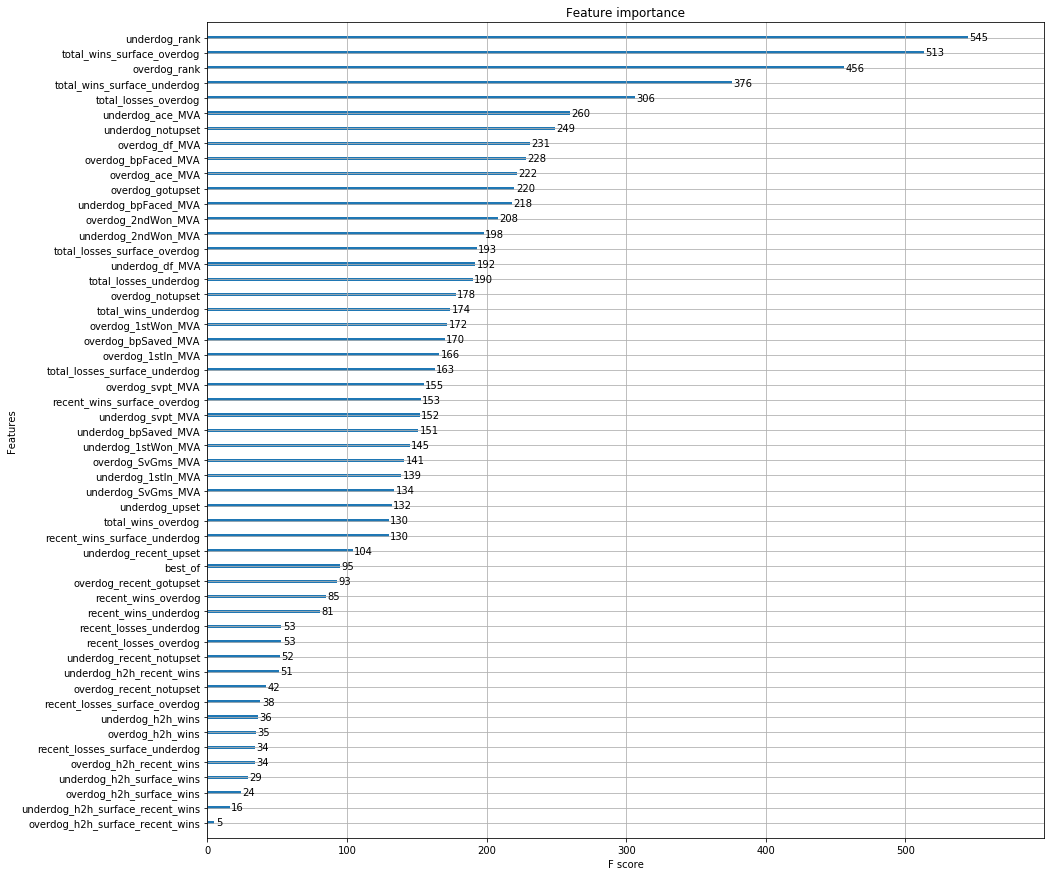

In [69]:
model.fit(train_x, train_y)

preds = model.predict(test_x)
print(accuracy_score(test_y,preds))

preds_train = model.predict(train_x)
print(accuracy_score(train_y, preds_train))

ax = xgboost.plot_importance(model)
fig = ax.figure
fig.set_size_inches(15, 15)